In [1]:
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
from termcolor import colored

In [2]:
#path = 'features_sunday_equalization.csv'
#path = 'features_ignoredWT1WT2_includingDUPandDEL.csv'
path = 'final_19_12_AGS.pickle'
df = pd.read_pickle(os.path.join(r'C:\Users\hemax\Desktop\Imagens_Membrana', path))

In [11]:
def plt_hist_and_stats_utest(columns, types, histogram):
    for column in columns:
        #create a new figure
        plt.figure()
        for tp in types:

            #subset to the type
            subset = df[df.Image.str.contains(tp)]

            #compute some statistics
            aux = subset[column].describe()

            #Draw the density plot
            sns.distplot(subset[column], hist = histogram, kde = False,
                        label = tp+r'(Mean = %0.2f, STD %0.2f, Max = %0.2f, Min = %0.2f)' % (aux['mean'], aux['std'], aux['max'], aux['min']))
            plt.legend(prop = {'size': 10}, title = 'Cell Type')
            plt.title(column)
            plt.xlabel(column)
            plt.ylabel('Counts')
            
        import scipy.stats as stats
        subset1  = df[df.Image.str.startswith(types[0])]
        subset2 = df[df.Image.str.startswith(types[1])]
        u_statistic, pVal = stats.mannwhitneyu(subset1[columns[0]], subset2[columns[0]], alternative = 'two-sided')
        print('THE P-VALUE IS:')
        print(pVal)
        if pVal < 0.05:
            aux = '\033[1m' + ' is ' + '\033[0m'
            aux = colored(aux, 'blue') 
            hipothesis =' H1: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        else:
            aux = '\033[1m' + ' is not ' + '\033[0m'
            aux = colored(aux, 'blue')
            hipothesis = ' H0: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        print('Hipothesis:' + hipothesis)
        #print(u_statistic)

In [17]:
typess = ['Mock','Del3846','Dup4146','Mut394', 'WT', 'Branco']
vs = typess[1]

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


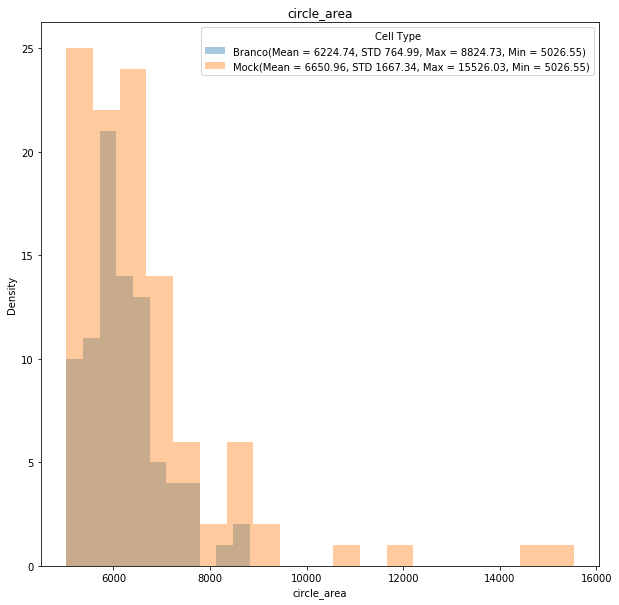

In [6]:
types = ['Branco', vs]
columns = ['circle_area']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


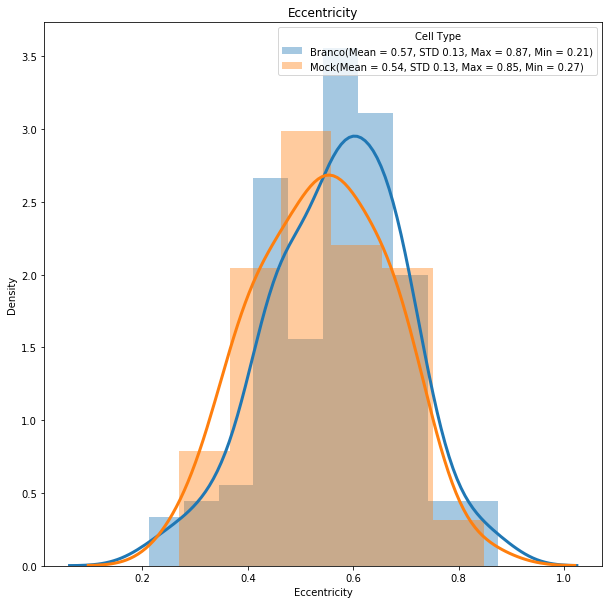

In [133]:
types = ['Branco', vs]
columns = ['Eccentricity']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


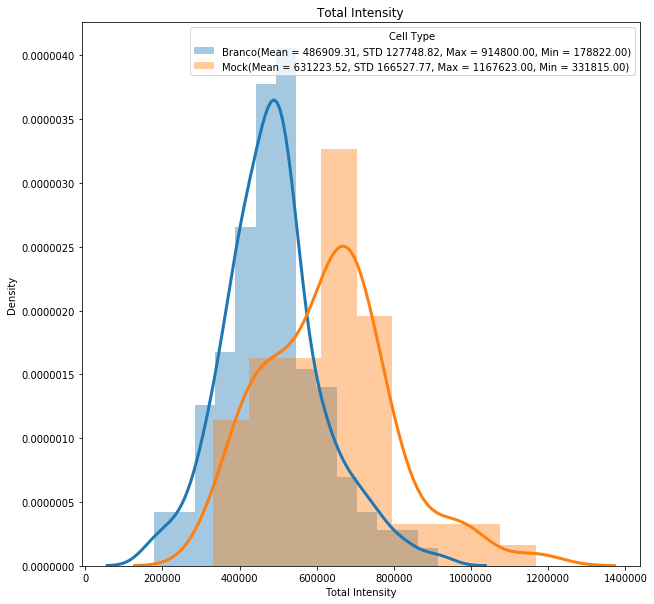

In [134]:
types = ['Branco', vs]
columns = ['Total Intensity']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


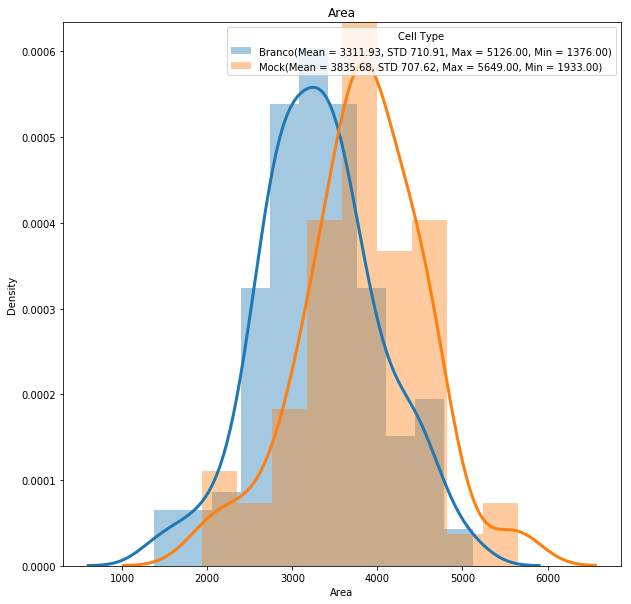

In [135]:
types = ['Branco', vs]
columns = ['Area']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

THE P-VALUE IS:
0.0
Hipothesis: H1: The difference is statistically significant (at significance level: 0.05).


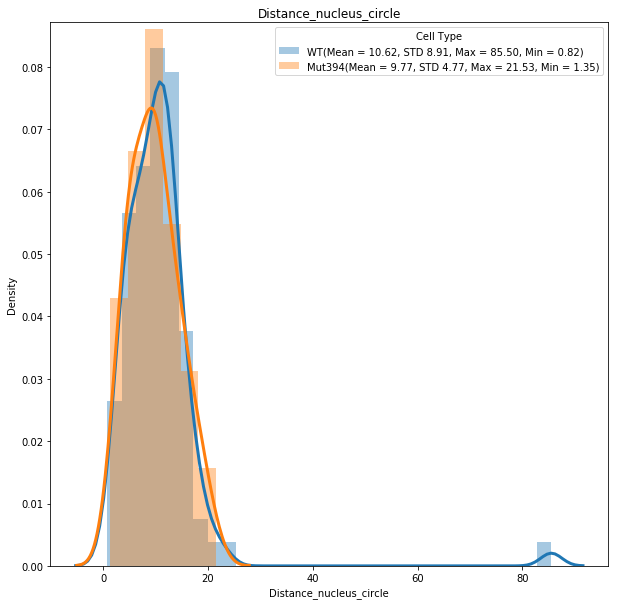

In [22]:
types = ['WT', vs]
columns = ['Distance_nucleus_circle']
plt.rcParams['figure.figsize'] = (10,10)
plt_hist_and_stats_utest(columns, types, True)

In [89]:
def stats_pval_table(columns, types):
        import scipy.stats as stats
        subset1  = df[df.Image.str.contains(types[0])]
        subset2 = df[df.Image.str.contains(types[1])]
        u_statistic, pVal = stats.mannwhitneyu(subset1[columns[0]], subset2[columns[0]], alternative = 'two-sided')
        return pVal

In [128]:
#types = [['WT', 'Del'], ['WT', 'Dup'], ['WT', 'MUT 88'], ['WT', 'MUT 394'], ['WT', 'MUT 635'], ['WT', 'MUT 760C'], 
 #        ['WT', 'MUT 977'], ['WT', 'MUT 1108'], ['WT', 'MUT 2450'], ['WT', 'MUT 2519']]
    
    
        
    
types = [[typess[5], typess[0]], [typess[5], typess[1]], [typess[5], typess[2]], [typess[5], typess[3]], [typess[5], typess[4]]]    
    
columns = [['Area'], ['BBox_Area'], ['Perimeter'], ['Eccentricity'], ['Total Intensity'], ['Mean Intensity'], ['Solidity'],
           ['Entropy'], ['Distance_nucleus_circle'], ['radius']]
plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd


pval_table = pd.DataFrame(columns = ["Comparison", "Area", "BBox_Area", "Perimeter", "Eccentricity", "Total Intensity", "Mean Intensity", 
                                     "Solidity", "Entropy", "Distance_nucleus_circle", "radius"])

for tp in types:
    pval_list = []
    for column in columns:
        pval = stats_pval_table(column, tp)
        pval_list.append(pval)
    comparison = tp[0] + ' vs ' + tp[1]
    area = pval_list[0]
    bbox_area = pval_list[1]
    perimeter = pval_list[2]
    eccentricity = pval_list[3]
    total_int = pval_list[4]
    mean_int = pval_list[5]
    solidity = pval_list[6]
    entropy = pval_list[7]
    dis_n_c = pval_list[8]
    radius = pval_list[9]
        
    res = {"Comparison": comparison, "Area": area, "BBox_Area": bbox_area, "Perimeter": perimeter, "Eccentricity": eccentricity,
          "Total Intensity": total_int, "Mean Intensity": mean_int, "Solidity": solidity, "Entropy": entropy, 
           "Distance_nucleus_circle": dis_n_c, "radius": radius}

    row = len(pval_table)
    pval_table.loc[row] = res


In [129]:
pval_table

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle,radius
0,Branco vs Mock,8.788961e-07,1.594464e-06,4.660297e-06,0.139019,4.485896e-09,1.177894e-04,0.294491,5.078036e-06,0.540502,1.050309e-08
1,Branco vs Del3846,1.800505e-06,1.589656e-06,8.029853e-06,0.803812,2.752774e-03,3.091539e-12,0.137661,3.210985e-02,0.870646,6.006793e-03
2,Branco vs Dup4146,1.647150e-20,3.609767e-20,3.448180e-19,0.209322,2.359434e-03,2.303541e-04,0.000693,2.766777e-02,0.796494,2.319415e-15
3,Branco vs Mut394,2.546452e-02,1.681470e-02,5.084783e-03,0.641383,8.858306e-01,5.482467e-02,0.127083,4.003970e-02,0.049729,1.355615e-03
4,Branco vs WT,5.089326e-01,6.680421e-01,5.748422e-01,0.052249,1.612482e-03,1.625234e-05,0.543021,6.057924e-08,0.012592,4.561133e-04


In [130]:
pval_table < 0.05

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle,radius
0,True,True,True,True,False,True,True,False,True,False,True
1,True,True,True,True,False,True,True,False,True,False,True
2,True,True,True,True,False,True,True,True,True,False,True
3,True,True,True,True,False,False,False,False,True,True,True
4,True,False,False,False,False,True,True,False,True,True,True


In [13]:
pval_table < 0.01

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle,radius
0,True,False,False,False,False,True,True,False,True,False,True
1,True,True,True,True,True,True,True,False,False,True,True
2,True,True,True,True,False,False,True,False,True,False,False
3,True,True,True,True,True,True,False,False,True,False,True
4,True,False,False,False,False,False,False,False,False,False,False


In [14]:
pval_table < 0.001

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle,radius
0,True,False,False,False,False,False,True,False,True,False,True
1,True,False,False,False,False,True,True,False,False,False,False
2,True,True,True,False,False,False,True,False,True,False,False
3,True,True,True,True,False,True,False,False,True,False,True
4,True,False,False,False,False,False,False,False,False,False,False


In [15]:
pval_table < 0.0001

,Comparison,Area,BBox_Area,Perimeter,Eccentricity,Total Intensity,Mean Intensity,Solidity,Entropy,Distance_nucleus_circle,radius
0,True,False,False,False,False,False,True,False,True,False,False
1,True,False,False,False,False,True,True,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,False
3,True,True,True,True,False,True,False,False,True,False,True
4,True,False,False,False,False,False,False,False,False,False,False


In [4]:
## tamanho da célula e do núcleo

## FEATURES RELATED TO SIZE

typess = ['Branco', 'Mock','Del3846','Dup4146','Mut394', 'WT']

types = [[typess[5], typess[0]], [typess[5], typess[1]], [typess[5], typess[2]], [typess[5], typess[3]], [typess[5], typess[4]], 
         ['Branco','Mock']]    
    
columns = [['Area'], ['Perimeter'], ['circle_area'],['circle_perimeter'], ['radius']]
plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd


pval_table = pd.DataFrame(columns = ["Comparison", "Nucleus Area", "Nucleus Perimeter", "Cell Area", 
                                     "Cell Perimeter", "Cell Radius"])

for tp in types:
    pval_list = []
    for column in columns:
        pval = stats_pval_table(column, tp)
        pval_list.append(pval)
    comparison = tp[0] + ' vs ' + tp[1]
    area = pval_list[0]
    perimeter = pval_list[1]
    c_area = pval_list[2]
    c_perimeter = pval_list[3]
    c_radius = pval_list[4]
        
    res = {"Comparison": comparison, "Nucleus Area": area, "Nucleus Perimeter": perimeter, 
           "Cell Area": c_area, "Cell Perimeter": c_perimeter, "Cell Radius": c_radius}

    row = len(pval_table)
    pval_table.loc[row] = res


In [26]:
pval_table

,Comparison,Nucleus Area,Nucleus Perimeter,Cell Area,Cell Perimeter,Cell Radius
0,WT vs Branco,5.089326e-01,5.748422e-01,4.561133e-04,4.561133e-04,4.561133e-04
1,WT vs Mock,1.296336e-03,2.438594e-03,1.920570e-03,1.920570e-03,1.920570e-03
2,WT vs Del3846,8.313925e-04,1.343601e-03,5.462760e-01,5.462760e-01,5.462760e-01
3,WT vs Dup4146,1.627609e-13,1.886428e-12,1.351151e-06,1.351151e-06,1.351151e-06
4,WT vs Mut394,1.347406e-01,3.227127e-02,8.232955e-01,8.232955e-01,8.232955e-01
5,Branco vs Mock,8.788961e-07,4.660297e-06,1.050309e-08,1.050309e-08,1.050309e-08


In [3]:
def obtain_columns(columns, typee):
        import scipy.stats as stats
        subset1  = df[df.Image.str.contains(typee)]
        subset1 = subset1[columns]
        return subset1

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mut394 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=8.233e-01 U_stat=3.760e+03
Branco v.s. Mock: Mann-Whitney-Wilcoxon test two-sided P_val=1.050e-08 U_stat=2.258e+03
Dup4146 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=1.351e-06 U_stat=6.972e+03
Del3846 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=5.463e-01 U_stat=3.395e+03
Mock v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=1.921e-03 U_stat=4.119e+03
Branco v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=4.561e-04 U_stat=4.818e+03


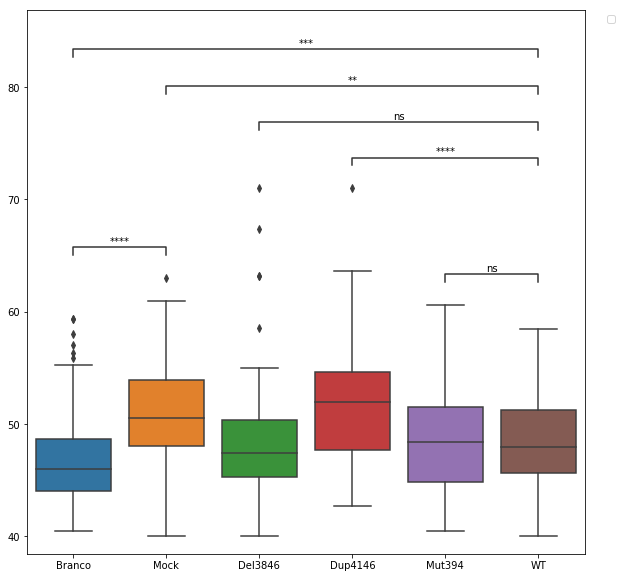

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


typess = ['Branco', 'Mock','Del3846','Dup4146','Mut394', 'WT']

    
columns = [['Area'], ['Perimeter'], ['circle_area'],['circle_perimeter'], ['radius']]

columns = [['radius']]

plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd




for column in columns:
    plt.figure()
    filename = []
    table = pd.DataFrame(columns = [])
    for tp in typess:
        columnn = obtain_columns(column, tp)
        
        
        a = []
        
        for i in range(0, len(columnn.to_numpy())):
            a.append(columnn.to_numpy()[i][0])
        
        
        
        table_aux = pd.DataFrame({tp: a})
        #table_aux[tp] = a
        
        table = pd.concat([table,table_aux], axis=1)
        
    
    ax = sns.boxplot(data=table)
    add_stat_annotation(ax, data=table,
    box_pairs=[(typess[5], typess[0]),
                             (typess[5], typess[1]),
                             ( typess[5],  typess[2]),
                            ( typess[5],  typess[3]),
                             (typess[5],  typess[4]),
              ('Branco','Mock')],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    plt.rcParams['figure.figsize'] = (20,20)
    #plt.title(columns[0])
    plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

In [91]:
def stats_pval_table(columns, types):
    


    import scipy.stats as stats
    subset1  = df[df.Image.str.contains(types[0])]
    subset2 = df[df.Image.str.contains(types[1])]

    if columns[0] == 'dist_centr_circle_pts':
        
        a1= subset1["dist_centr_circle_pts"]

        aux1 = []

        for items in a1.iteritems(): 
                line = items[1]

                for j in range(0, len(line)):
                    aux1.append(line[j])

                    
                    
                    
        a2= subset2["dist_centr_circle_pts"]

        aux2 = []

        for items in a2.iteritems(): 
                line = items[1]

                for j in range(0, len(line)):
                    aux2.append(line[j])            

        u_statistic, pVal = stats.mannwhitneyu(aux1, aux2, alternative = 'two-sided')           
                    
        
    else:

        u_statistic, pVal = stats.mannwhitneyu(subset1[columns[0]], subset2[columns[0]], alternative = 'two-sided')
    return pVal

In [92]:
## features related to relative position and size of the nucleus


typess = ['Branco', 'Mock','Del3846','Dup4146','Mut394', 'WT']

types = [[typess[5], typess[0]], [typess[5], typess[1]], [typess[5], typess[2]], [typess[5], typess[3]], [typess[5], typess[4]], 
         ['Branco','Mock']]    
    
columns = [['Distance_nucleus_circle'], ['dist_centr_circle_pts'], ['circle_area/nucleus_area']]
plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd


pval_table = pd.DataFrame(columns = ["Comparison", "Distance_nucleus_circle", "Distance_nucleus_circle_points", 
                                     "Cell_Area/Nucleus_Area"])

for tp in types:
    pval_list = []
    for column in columns:
        pval = stats_pval_table(column, tp)
        pval_list.append(pval)
    comparison = tp[0] + ' vs ' + tp[1]
    dist_n_c = pval_list[0]
    dist_n_c_pts = pval_list[1]
    c_area_n_area = pval_list[2]
        
    res = {"Comparison": comparison, "Distance_nucleus_circle": dist_n_c, "Distance_nucleus_circle_points": dist_n_c_pts, 
                                     "Cell_Area/Nucleus_Area": c_area_n_area}

    row = len(pval_table)
    pval_table.loc[row] = res

In [93]:
pval_table

,Comparison,Distance_nucleus_circle,Distance_nucleus_circle_points,Cell_Area/Nucleus_Area
0,WT vs Branco,0.012592,8.077430e-177,3.212715e-03
1,WT vs Mock,0.008491,3.223348e-152,9.456875e-02
2,WT vs Del3846,0.050062,3.139562e-01,3.689804e-06
3,WT vs Dup4146,0.027630,0.000000e+00,8.398899e-08
4,WT vs Mut394,0.746935,8.417478e-04,1.053328e-01
5,Branco vs Mock,0.540502,0.000000e+00,1.750128e-01


In [105]:
def obtain_columns(columns, typee):
        import scipy.stats as stats
        subset1  = df[df.Image.str.contains(typee)]
        subset1 = subset1[columns]
        
        
        if columns[0] == 'dist_centr_circle_pts':
            
            aux = []
    
            for items in subset1.iteritems(): 
                    line = items[1]
                
                    for j in range(0, len(line)):
                        aux.append(line[j])
                        
            subset1 = aux            
        
        
        return subset1

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Mut394 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=1.053e-01 U_stat=3.156e+03
Branco v.s. Mock: Mann-Whitney-Wilcoxon test two-sided P_val=1.750e-01 U_stat=3.959e+03
Dup4146 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=8.399e-08 U_stat=2.803e+03
Del3846 v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=3.690e-06 U_stat=2.104e+03
Mock v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=9.457e-02 U_stat=2.706e+03
Branco v.s. WT: Mann-Whitney-Wilcoxon test two-sided P_val=3.213e-03 U_stat=5.101e+03


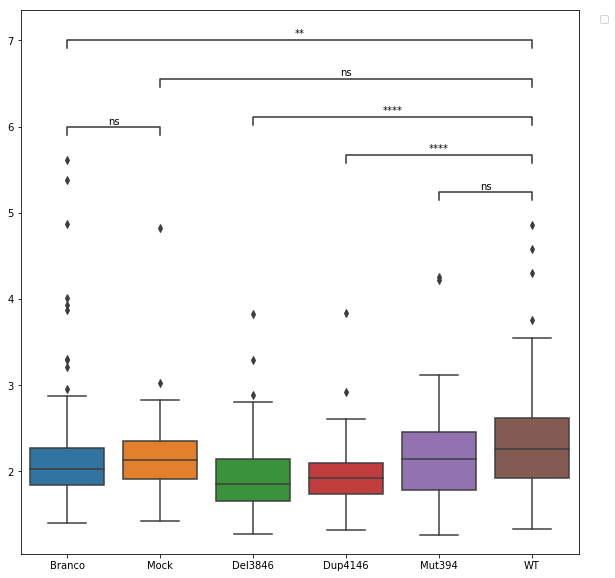

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation


typess = ['Branco', 'Mock','Del3846','Dup4146','Mut394', 'WT']


columns = [['Distance_nucleus_circle'], ['dist_centr_circle_pts'], ['circle_area/nucleus_area']]

columns = [['circle_area/nucleus_area']]

plt.rcParams['figure.figsize'] = (10,10)

import pandas as pd




for column in columns:
    plt.figure()
    filename = []
    table = pd.DataFrame(columns = [])
    for tp in typess:
        columnn = obtain_columns(column, tp)
        
        
        a = []
        
        for i in range(0, len(columnn.to_numpy())):
            a.append(columnn.to_numpy()[i][0])
        
        
        
        table_aux = pd.DataFrame({tp: a})
        #table_aux[tp] = a
        
        table = pd.concat([table,table_aux], axis=1)
        
    
    ax = sns.boxplot(data=table)
    add_stat_annotation(ax, data=table,
    box_pairs=[(typess[5], typess[0]),
                             (typess[5], typess[1]),
                             ( typess[5],  typess[2]),
                            ( typess[5],  typess[3]),
                             (typess[5],  typess[4]),
              ('Branco','Mock')],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    plt.rcParams['figure.figsize'] = (20,20)
    #plt.title(columns[0])
    plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

In [96]:
types = [typess[0]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

SyntaxError: invalid syntax (<ipython-input-96-77addd8e1f4b>, line 4)

No handles with labels found to put in legend.


['Mock']
66


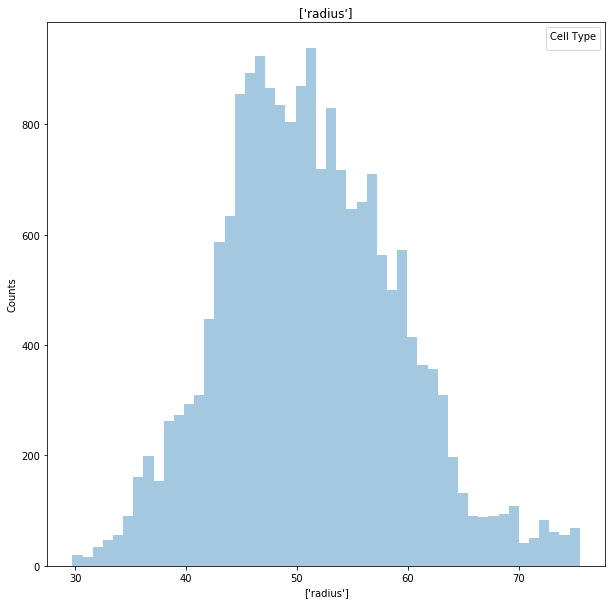

In [120]:
types = [typess[1]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

No handles with labels found to put in legend.


['Del3846']
74


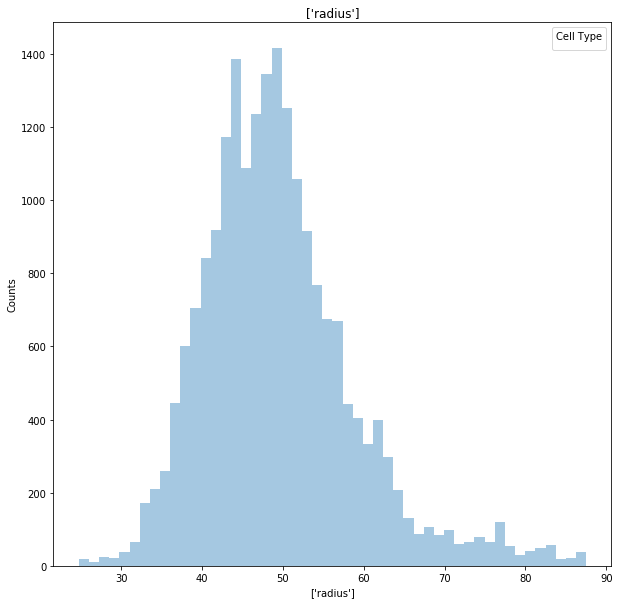

In [121]:
types = [typess[2]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

No handles with labels found to put in legend.


['Dup4146']
103


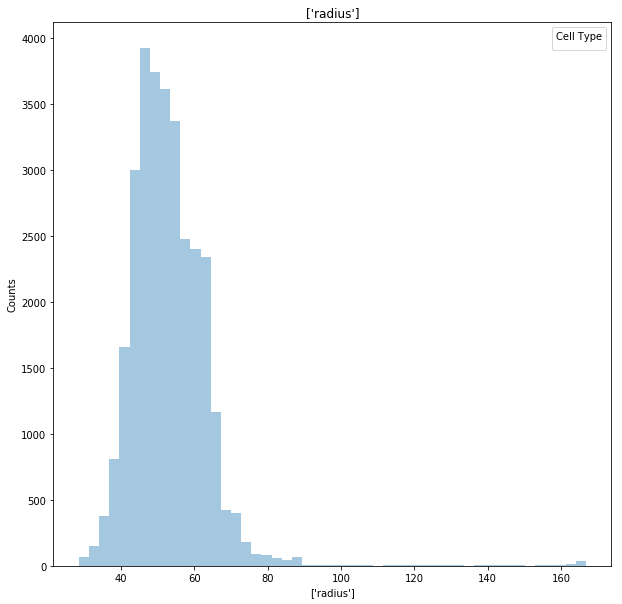

In [122]:
types = [typess[3]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

No handles with labels found to put in legend.


['Mut394']
76


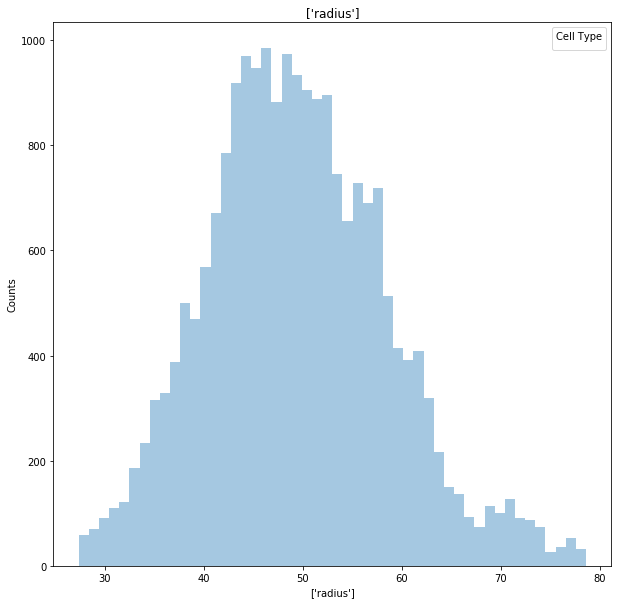

In [123]:
types = [typess[4]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)

No handles with labels found to put in legend.


['WT']
97


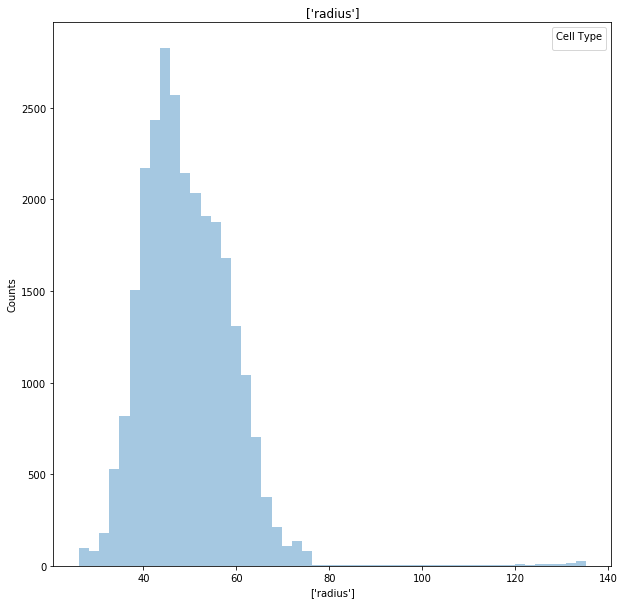

In [124]:
types = [typess[5]]
print(types)
plt.rcParams['figure.figsize'] = (10,10)
plt_new(types)